# Machine learning project 213886 Dan Watson

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import linear_model
from sklearn import decomposition
from sklearn import model_selection
from sklearn import svm
from sklearn import neural_network
from sklearn import neighbors
from sklearn import semi_supervised
sns.set()

In [2]:
add_train = pd.read_csv("additional_training.csv")
confidence = pd.read_csv("annotation_confidence.csv")
submission = pd.read_csv("sample_valid_submission.csv")
prop = pd.read_csv("test_proportions.csv")
test = pd.read_csv("testing.csv")
train = pd.read_csv("training.csv")
#Importing

In [3]:
newtrain = pd.concat([train, add_train]) #Merging training data and additional training data

In [4]:
newtrain.head(5)

,ID,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,...,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,prediction
0,1,0.00000,0.00000,0.0,0.00000,0.44033,0.000,0.277470,0.84990,0.00000,...,0.031213,0.035996,0.055542,0.027488,0.010136,0.028576,0.016819,0.013863,0.020987,1
1,2,0.00000,0.00000,0.0,0.00000,0.00000,1.848,0.000000,0.00000,0.00000,...,0.007135,0.028133,0.014696,0.007583,0.006905,0.019008,0.022172,0.025843,0.020629,1
2,3,0.00000,0.00000,0.0,0.30395,0.00000,0.000,0.119300,1.05840,0.51748,...,0.015431,0.014210,0.014325,0.022543,0.012947,0.018889,0.016838,0.018631,0.014774,1
3,4,0.21168,0.53031,0.0,0.00000,0.17560,0.000,0.000000,0.35810,0.86264,...,0.007115,0.017257,0.008328,0.029539,0.006165,0.012097,0.022226,0.041484,0.016790,1
4,5,0.00000,0.00000,0.0,0.60434,0.00000,0.000,0.008473,0.51557,0.00000,...,0.006654,0.005674,0.004851,0.010119,0.004460,0.009657,0.006265,0.006707,0.013045,1


In [5]:
test.head(5)

,ID,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,...,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,1,0.17006,0.56194,0.00000,0.22973,0.0,0.00000,0.0,0.000000,0.00000,...,0.060642,0.053481,0.021768,0.042407,0.017447,0.018773,0.046790,0.045160,0.024613,0.017370
1,2,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.000000,0.00000,...,0.048064,0.056093,0.025707,0.032084,0.026403,0.026091,0.021820,0.021052,0.041294,0.021800
2,3,0.00000,0.00000,0.00000,0.00000,0.0,0.75842,0.0,1.974600,0.00000,...,0.024180,0.022938,0.031024,0.043973,0.027853,0.021314,0.032854,0.036091,0.024968,0.019759
3,4,0.00000,0.00000,0.11766,0.00000,0.0,0.00000,0.0,0.000000,0.00000,...,0.024722,0.017600,0.056849,0.029289,0.022532,0.054040,0.063078,0.033617,0.038866,0.050231
4,5,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.065652,0.44262,...,0.012665,0.010048,0.006801,0.009565,0.016388,0.016043,0.017562,0.011259,0.028914,0.018655


In [27]:
prop #Proportions

,0.3848 class 1
0,0.6152 class 0


# Proportion function

In [6]:
def proportions(df): #Function to produce the proportions of predictions made
    print("Proportion of ones predicted: {}".format(sum(df["prediction"] == 1)/len(df["prediction"])))
    print("Proportion of zeros predicted: {}".format(sum(df["prediction"] == 0)/len(df["prediction"])))

## Proportions

In [7]:
print("\nProportions of ones in test data: 0.3848")
print("Proportions of zeros in test data: 0.6152")
    
print("\nProportions of ones in training data: {}".format(sum(newtrain["prediction"] == 1)/len(newtrain["prediction"])))
print("Proportions of zeros in training data: {}".format(sum(newtrain["prediction"] == 0)/len(newtrain["prediction"])))


Proportions of ones in test data: 0.3848
Proportions of zeros in test data: 0.6152

Proportions of ones in training data: 0.8678021086780211
Proportions of zeros in training data: 0.1321978913219789


## Plots

In [8]:
GISTmean = newtrain.iloc[:,4097:4609].mean(axis = 1)
CNNmean = newtrain.iloc[:,1:4097].mean(axis=1) #Taking the mean of respective type of features (CNN or GIST)

In [9]:
smalldf = GISTmean.to_frame(name = "GISTmean")
smalldf["CNNmean"] = CNNmean
smalldf["prediction"] = newtrain["prediction"]

Text(0.5, 1.0, 'Plot of means of features GIST and CNN')

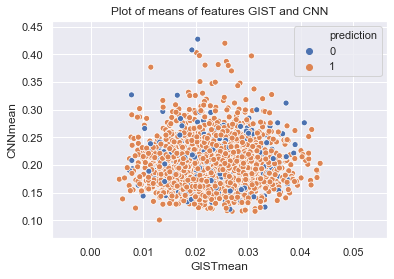

In [10]:
sns.scatterplot(x="GISTmean", y="CNNmean",
              hue="prediction",
              data=smalldf);
plt.title("Plot of means of features GIST and CNN")

In [11]:
smalldf.head(5)

,GISTmean,CNNmean,prediction
0,0.024369,0.190031,1
1,0.031770,0.217280,1
2,0.016818,0.174578,1
3,0.019779,0.201204,1
4,0.010748,0.157969,1


# PCA

In [12]:
def PCAtransform(newtrain, n_components): #Function to reduce training set to 2 dimensions which allows plotting with labels
    newtrain = pd.concat([train, add_train])
    m = newtrain.mean(axis=1)
    for i, col in enumerate(newtrain):
        newtrain.iloc[:, i] = newtrain.iloc[:, i].fillna(m)
    X_train = newtrain.drop(columns = ["ID", "prediction"])
    pca = decomposition.PCA(n_components = n_components)
    pcadf = pca.fit_transform(X_train)
    sns.scatterplot(x = pcadf[:,0], y = pcadf[:,1], hue = newtrain["prediction"])
    plt.xlabel("First component")
    plt.ylabel("Second component")
    plt.title("Data reduced to two components with predictions")

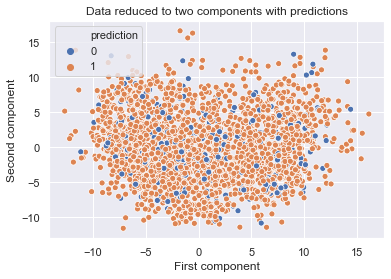

In [13]:
PCAtransform(newtrain, n_components = 2)

Lack of decision boundary in the reduced data - probably not a good idea to use SVM or MLP.

## Voting classifier - Logistic regression and Ridge classifcation: Final model

In [15]:
def voting_classifier(train, test, n_components, max_iter):
    newtrain = pd.concat([train, add_train]) #Merging the two dataframes
    temptrain = newtrain.drop(columns=['ID', 'prediction']) #Temporarily dropping ID and predictions
    n = temptrain.iloc[:,4097:].mean(axis=1) #Mean of GIST columns
    m = temptrain.iloc[:,1:4097].mean(axis = 1) #Mean of CNN columns
    for i, list1 in enumerate(newtrain.iloc[:,1:4097]):
        newtrain.iloc[:,i+1] = newtrain.iloc[:,i+1].fillna(m) #Replacing NaN's with the mean of the respective row in column.
    for i, list1 in enumerate(newtrain.iloc[:,4097:]):
        newtrain.iloc[:,i+4097] = newtrain.iloc[:,i+4097].fillna(n)
    
    newtrain["confidence"] = confidence["confidence"] #Confidence column
    newtrain["combined"] = newtrain[['prediction', 'confidence']].mean(axis=1) #Meaning confidence and predictions
    y_train = newtrain.combined.replace(0.5, 0) #Making the confidently not memorable images the lowest label 
    print("Before label encoding:", np.unique(y_train))
    le = preprocessing.LabelEncoder() #Label encoding
    y_labeled = le.fit_transform(y_train)
    print("After label encoding: ", np.unique(y_labeled))
    X_train = newtrain.drop(columns = ["ID", "prediction", "combined", "confidence"]) #Dropping columns that aren't to be used in model.
    scaler = preprocessing.StandardScaler().fit(X_train) #Scaling
    X_scaled = scaler.transform(X_train)
    pca = decomposition.PCA(n_components = n_components) #PCA
    pcadf = pca.fit_transform(X_scaled)
    
    logreg = linear_model.LogisticRegression(C = 0.00001, class_weight = {0:12, 1:1.5, 2:1, 3:2}, max_iter = max_iter) #Logistic regression
    ridge = linear_model.RidgeClassifier(class_weight = {0:12, 1:1.5, 2:1, 3:2}, alpha = 10, max_iter = max_iter) #Ridge classificaiton
    clf = ensemble.VotingClassifier(estimators=[("lr", logreg), ("ridge", ridge)]) #Voting classifier
    
    ridge.fit(pcadf, y_labeled) #Fitting
    score = ridge.score(pcadf, y_labeled) #Training score
    print("Score on training set", score)
    ID = test["ID"]
    test = test.drop(columns = "ID")
    test_scaled = scaler.transform(test) #Scaling and reducing dimensions of test set
    pca_test = pca.transform(test_scaled)
    predictions = ridge.predict(pca_test) #Predicting
    predictions = le.inverse_transform(predictions) #From label encoded values back to normal values
    print("Before rounding: {}".format(predictions))
    predictions = np.round(predictions) #Rounding to get values back to binary.
    print("After rounding: {}".format(predictions))
    df = pd.DataFrame(data = predictions)
    df["ID"] = ID #Creating a dataframe of predictions to be returned
    df["prediction"] = predictions
    df = df.drop(columns = 0)
    df = df.astype(int)
    return df

In [16]:
voting = voting_classifier(train, test, n_components = 10, max_iter = 3000)

Before label encoding: [0.   0.33 0.83 1.  ]
After label encoding:  [0 1 2 3]
Score on training set 0.3580697485806975
Before rounding: [0. 0. 1. ... 0. 1. 0.]
After rounding: [0. 0. 1. ... 0. 1. 0.]


In [17]:
proportions(voting) #Proportions function

Proportion of ones predicted: 0.375863230587839
Proportion of zeros predicted: 0.624136769412161


In [18]:
voting.to_csv("voting_ridge_logreg_final.csv", index = False) #Saving to CSV

All following cells follow the same pattern as above but for different estimators.

# Varying components and the CV results produced for graph in results section

In [19]:
def voting_components(train, test):
    newtrain = pd.concat([train, add_train])
    temptrain = newtrain.drop(columns=['ID', 'prediction'])
    n = temptrain.iloc[:,4097:].mean(axis=1)
    m = temptrain.iloc[:,1:4097].mean(axis = 1)
    for i, list1 in enumerate(newtrain.iloc[:,1:4097]):
        newtrain.iloc[:,i+1] = newtrain.iloc[:,i+1].fillna(m)
    for i, list1 in enumerate(newtrain.iloc[:,4097:]):
        newtrain.iloc[:,i+4097] = newtrain.iloc[:,i+4097].fillna(n)
    newtrain["confidence"] = confidence["confidence"]
    
    newtrain["combined"] = newtrain[['prediction', 'confidence']].mean(axis=1)
    
    y_train = newtrain.combined.replace(0.5, 0)
    le = preprocessing.LabelEncoder()
    y_labeled = le.fit_transform(y_train)
    X_train = newtrain.drop(columns = ["ID", "prediction", "combined", "confidence"])
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled = scaler.transform(X_train)
    xaxis = [i for i in range(1,100)]
    scores = []
    for i in range(1,100): #Looping over PCA components to produce plot of components vs cross validation scores
        pca = decomposition.PCA(n_components = i)
        pcadf = pca.fit_transform(X_scaled)
        logreg = linear_model.LogisticRegressionCV(Cs = [1e-5], class_weight = {0:11, 1:5, 2:1.5, 3:1.5})
        ridge = linear_model.RidgeClassifierCV(class_weight = {0:11, 1:5, 2:1.5, 3:1.5}, alphas = [10], normalize = True)
        clf = ensemble.VotingClassifier(estimators=[("lr", logreg), ("ridge", ridge)])
        clf.fit(pcadf, y_labeled)
        score = clf.score(pcadf, y_labeled)
        scores.append(score)
    ID = test["ID"]
    test = test.drop(columns = "ID")
    test_scaled = scaler.transform(test)
    pca_test = pca.transform(test_scaled)
    predictions = clf.predict(pca_test)
    predictions = le.inverse_transform(predictions)
    print("Before : {}".format(predictions))
    predictions = np.round(predictions)
    print("After : {}".format(predictions))
    df = pd.DataFrame(data = predictions)
    df["ID"] = ID
    df["prediction"] = predictions
    df = df.drop(columns = 0)
    df = df.astype(int)
    plt.plot(xaxis, scores)
    plt.xlabel("Number of PCA components")
    plt.ylabel("Leave one out cross validation scores")
    return df

Before : [0.   0.   0.83 ... 0.   0.   0.  ]
After : [0. 0. 1. ... 0. 0. 0.]


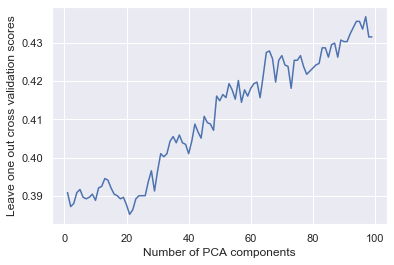

In [20]:
components = voting_components(train, test)

# No PCA

In [21]:
def voting_pca(train, test):
    newtrain = pd.concat([train, add_train])
    temptrain = newtrain.drop(columns=['ID', 'prediction'])
    n = temptrain.iloc[:,4097:].mean(axis=1)
    m = temptrain.iloc[:,1:4097].mean(axis = 1)
    for i, list1 in enumerate(newtrain.iloc[:,1:4097]):
        newtrain.iloc[:,i+1] = newtrain.iloc[:,i+1].fillna(m)
    for i, list1 in enumerate(newtrain.iloc[:,4097:]):
        newtrain.iloc[:,i+4097] = newtrain.iloc[:,i+4097].fillna(n)
    newtrain["confidence"] = confidence["confidence"]
    
    newtrain["combined"] = newtrain[['prediction', 'confidence']].mean(axis=1)
    y_train = newtrain.combined.replace(0.5, 0)
    le = preprocessing.LabelEncoder()
    y_labeled = le.fit_transform(y_train)
    X_train = newtrain.drop(columns = ["ID", "prediction", "combined", "confidence"])
    logreg = linear_model.LogisticRegressionCV(Cs = [1e-5], class_weight = {0:12, 1:5, 2:1.5, 3:1.5})
    ridge = linear_model.RidgeClassifierCV(class_weight = {0:12, 1:5, 2:1.5, 3:1.5}, alphas = [10], normalize = True)
    clf = ensemble.VotingClassifier(estimators=[("lr", logreg), ("ridge", ridge)])
    clf.fit(X_train, y_labeled)
    score = clf.score(X_train, y_labeled)
    print(score)
    ID = test["ID"]
    test = test.drop(columns = "ID")
    predictions = clf.predict(test)
    predictions = le.inverse_transform(predictions)
    print("Before : {}".format(predictions))
    predictions = np.round(predictions)
    print("After : {}".format(predictions))
    df = pd.DataFrame(data = predictions)
    df["ID"] = ID
    df["prediction"] = predictions
    df = df.drop(columns = 0)
    df = df.astype(int)
    return df

In [22]:
voting_no_pca = voting_pca(train, test)

0.5344687753446877
Before : [0.   0.   0.83 ... 0.   0.   0.  ]
After : [0. 0. 1. ... 0. 0. 0.]


In [23]:
proportions(voting_no_pca)

Proportion of ones predicted: 0.3350176856998484
Proportion of zeros predicted: 0.6649823143001516


In [24]:
voting_no_pca.to_csv("voting_no_pca.csv", index = False)

# Gridsearch and code to produce graphs in results section

In [25]:
def voting_grid(train, test, cv, n_components):
    import xgboost as xgb
    newtrain = pd.concat([train, add_train])
    temptrain = newtrain.drop(columns=['ID', 'prediction'])
    n = temptrain.iloc[:,4097:].mean(axis=1)
    m = temptrain.iloc[:,1:4097].mean(axis = 1)
    for i, list1 in enumerate(newtrain.iloc[:,1:4097]):
        newtrain.iloc[:,i+1] = newtrain.iloc[:,i+1].fillna(m)
    for i, list1 in enumerate(newtrain.iloc[:,4097:]):
        newtrain.iloc[:,i+4097] = newtrain.iloc[:,i+4097].fillna(n)
    newtrain["confidence"] = confidence["confidence"]
    
    newtrain["combined"] = newtrain[['prediction', 'confidence']].mean(axis=1)
    
    y_train = newtrain.combined.replace(0.5, 0)
    le = preprocessing.LabelEncoder()
    y_labeled = le.fit_transform(y_train)
    X_train = newtrain.drop(columns = ["ID", "prediction", "combined", "confidence"])
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled = scaler.transform(X_train)
    pca = decomposition.PCA(n_components = i)
    pcadf = pca.fit_transform(X_scaled)
    logreg = linear_model.LogisticRegression(class_weight = {0:11, 1:5, 2:1.5, 3:1.5})
    ridge = linear_model.RidgeClassifier(class_weight = {0:11, 1:5, 2:1.5, 3:1.5})
    voting = ensemble.VotingClassifier(estimators=[("lr", logreg), ("ridge", ridge)])
    param_grid = {"lr__C" : [1e-5, 1e-4, 1e-3, 1e-2],
                 "ridge__alpha" : [0.05, 0.5, 5, 10, 20],
                 "lr__solver" : ["lbfgs", "liblinear", "newton-cg"],
                 "ridge__solver" : ["auto", "cholesky", "lsqr", "sparse_cg", "svd"],
                  "ridge__normalize" : [True, False]}
    clf = model_selection.GridSearchCV(voting, param_grid = param_grid, cv = cv, scoring = "f1_weighted")
    clf.fit(pcadf, y_labeled)
    score = clf.score(pcadf, y_labeled)
    print(score)
    ID = test["ID"]
    test = test.drop(columns = "ID")
    test_scaled = scaler.transform(test)
    pca_test = pca.transform(test_scaled)
    predictions = clf.predict(pca_test)
    predictions = le.inverse_transform(predictions)
    print("Before : {}".format(predictions))
    predictions = np.round(predictions)
    print("After : {}".format(predictions))
    df = pd.DataFrame(data = predictions)
    df["ID"] = ID
    df["prediction"] = predictions
    df = df.drop(columns = 0)
    df = df.astype(int)
    cvresults = clf.cv_results_
    cvdf = pd.DataFrame.from_dict(cvresults)
    return df, cvdf

In [26]:
#voting, cvdf = voting_grid(train, test, cv = 10, n_components = 10)

KeyboardInterrupt: 

In [ ]:
#cvdf.groupby("param_ridge__normalize")["mean_test_score"].max().plot(kind = "bar", rot = 45, title = "Average score")

In [ ]:
#cvdf.groupby("param_ridge__solver")["mean_test_score"].max().plot(kind = "bar", rot = 45, title = "Average score")

In [ ]:
#cvdf.groupby("param_lr__C")["mean_test_score"].max().plot(kind = "bar", rot = 45, title = "Average score")

In [ ]:
#cvdf.groupby("param_lr__solver")["mean_test_score"].max().plot(kind = "bar", rot = 45, title = "Average score")

In [ ]:
#cvdf.groupby("param_ridge__alpha")["mean_test_score"].max().plot(kind = "bar", rot = 45, title = "Average score")

## SGDClassifier

In [ ]:
def PCAcrossvalidationConfidenceSGDC(train, test, cv, max_iter, n_components):
    newtrain = pd.concat([train, add_train])
    temptrain = newtrain.drop(columns = ["ID", "prediction"])
    m = temptrain.mean(axis=1)
    for i, col in enumerate(newtrain):
        newtrain.iloc[:, i] = newtrain.iloc[:, i].fillna(m)
    newtrain["confidence"] = confidence["confidence"]
    newtrain["combined"] = newtrain[['prediction', 'confidence']].mean(axis=1)
    y_train = newtrain["combined"]
    le = preprocessing.LabelEncoder()
    y_labeled = le.fit_transform(y_train)
    X_train = newtrain.drop(columns = ["ID", "prediction", "combined", "confidence"])
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled = scaler.transform(X_train)
    pca = decomposition.PCA(n_components = n_components)
    pcadf = pca.fit_transform(X_scaled)
    SGDC = linear_model.SGDClassifier(max_iter=max_iter, class_weight = {0:2, 1:12, 2:1, 3:2})
    param_grid = {"loss" : ['log'], 
                  "alpha" : [0.00001, 0.0001, 0.001, 0.01],
                 "penalty" : ['l2', 'l1', 'elasticnet']}
    clf = model_selection.GridSearchCV(SGDC, param_grid = param_grid, cv = cv, scoring = "balanced_accuracy")
    clf.fit(pcadf, y_labeled)
    print(clf.best_estimator_)
    print(clf.best_params_)
    print(clf.best_score_)
    ID = test["ID"]
    test = test.drop(columns = "ID")
    test_scaled = scaler.transform(test)
    pca_test = pca.transform(test_scaled)
    predictions = clf.predict(pca_test)
    predictions = le.inverse_transform(predictions)
    print("Before : {}".format(predictions))
    predictions = np.round(predictions)
    print("After : {}".format(predictions))
    train_predictions = clf.predict(pcadf)
    train_predictions = le.inverse_transform(train_predictions)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    df = pd.DataFrame(data = predictions)
    df["ID"] = ID
    df["prediction"] = predictions
    df = df.drop(columns = 0)
    df = df.astype(int)
    return df

In [ ]:
#SGDC = PCAcrossvalidationConfidenceSGDC(train, test, cv = 10, max_iter = 5000, n_components = 10)

In [ ]:
#proportions(SGDC)

In [ ]:
#SGDC.to_csv("SGDC.csv", index=  False)

## Train test split

In [ ]:
def train_test(train, test, max_iter, n_components, cv):
    newtrain = pd.concat([train, add_train])
    ID = newtrain["ID"]
    newtrain["confidence"] = confidence["confidence"]
    newtrain["combined"] = newtrain[['prediction', 'confidence']].mean(axis=1)
    y_train = newtrain["combined"]
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(y_train)
    temptrain = newtrain.drop(columns = ["ID", "prediction"])
    m = temptrain.mean(axis=1)
    for i, col in enumerate(newtrain):
        newtrain.iloc[:, i] = newtrain.iloc[:, i].fillna(m)
    X = newtrain.drop(columns = ["prediction", "ID", "confidence", "combined"])
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, stratify = y)
    
    test = test.drop(columns = "ID")
    scaler = preprocessing.StandardScaler().fit(X_train)
    test_scaled = scaler.transform(X_test)
    X_scaled = scaler.transform(X_train)
    bigtest_scaled = scaler.transform(test)
    pca = decomposition.PCA(n_components = n_components)
    pcadf = pca.fit_transform(X_scaled)
    pca_test = pca.transform(test_scaled)
    logreg = linear_model.RidgeClassifier(class_weight = "balanced", max_iter = max_iter, random_state = 5)
    param_grid = {}
    clf = model_selection.GridSearchCV(logreg, param_grid = param_grid, cv = cv, scoring = "f1_weighted")
    clf.fit(pcadf, y_train)
    print(clf.best_estimator_)
    print(clf.best_score_)
    predictions = clf.predict(pca_test)
    predictions = le.inverse_transform(predictions)
    predictions = np.round(predictions)
    y_test = le.inverse_transform(y_test)
    y_test = np.round(y_test)
    test_reduced = pca.transform(bigtest_scaled)
    test_predictions = clf.predict(test_reduced)
    test_predictions = le.inverse_transform(test_predictions)
    test_predictions = np.round(test_predictions)
    df = pd.DataFrame(data = test_predictions)
    df["prediction"] = test_predictions
    df = df.drop(columns = 0)
    df = df.astype(int)
    return df

In [ ]:
#example = train_test(train, test, max_iter = 3000, n_components = 10, cv = 15)

In [ ]:
#example["ID"] = test["ID"]

In [ ]:
#columns_titles = ["ID","prediction"]
#example=example.reindex(columns=columns_titles)

In [ ]:
#proportions(example)

In [ ]:
#example.to_csv("traintestLRConfidence10_balanced1.csv", index = False)

## SVM

In [ ]:
def PCAcrossvalidationConfidenceSVC(train, test, cv, n_components):
    newtrain = pd.concat([train, add_train])
    temptrain = newtrain.drop(columns = ["ID", "prediction"])
    m = temptrain.mean(axis=1)
    for i, col in enumerate(newtrain):
        newtrain.iloc[:, i] = newtrain.iloc[:, i].fillna(m)
    newtrain["confidence"] = confidence["confidence"]
    newtrain["combined"] = newtrain[['prediction', 'confidence']].mean(axis=1)
    y_train = newtrain["combined"]
    le = preprocessing.LabelEncoder()
    y_labeled = le.fit_transform(y_train)
    X_train = newtrain.drop(columns = ["ID", "prediction", "combined", "confidence"])
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled = scaler.transform(X_train)
    pca = decomposition.PCA(n_components = n_components)
    pcadf = pca.fit_transform(X_scaled)
    #sns.scatterplot(x = pcadf[:,0], y = pcadf[:,1], hue = newtrain["prediction"])
    SVMC = svm.SVC(class_weight = "balanced", probability = True)
    svc_param_grid = {'kernel': ['linear', 'rbf', 'sigmoid'], 
                   'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [0.00001,0.0001,0.001, 0.01,0.1,1]}

    clf = model_selection.GridSearchCV(SVMC, param_grid = svc_param_grid, cv=cv)
    clf.fit(pcadf, y_labeled)
    print(clf.best_params_)
    print(clf.best_score_)
    ID = test["ID"]
    test = test.drop(columns = "ID")
    test_scaled = scaler.transform(test)
    pca_test = pca.transform(test_scaled)
    predictions = clf.predict(pca_test)
    predictions = le.inverse_transform(predictions)
    print("Before : {}".format(predictions))
    predictions = np.round(predictions)
    print("After : {}".format(predictions))
    #sns.scatterplot(x = pca_test[:,0], y = pca_test[:,1], hue = predictions)
    train_predictions = clf.predict(pcadf)
    train_predictions = le.inverse_transform(train_predictions)
    print("Train predictions : {}".format(train_predictions))
    print("Confusion matrices: {}".format(confusion_matrix(y_train.astype(int), train_predictions.astype(int))))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    df = pd.DataFrame(data = predictions)
    df["ID"] = ID
    df["prediction"] = predictions
    df = df.drop(columns = 0)
    df = df.astype(int)
    return df

In [ ]:
#SVC_CV = PCAcrossvalidationConfidenceSVC(train, test, cv = 5, n_components = 50)

In [ ]:
#proportions(SVC_CV)

## MLP classifier

In [ ]:
def PCAcrossvalidationConfidenceMLP(train, test, cv, n_components, max_iter):
    newtrain = pd.concat([train, add_train])
    temptrain = newtrain.drop(columns = ["ID", "prediction"])
    m = temptrain.mean(axis=1)
    for i, col in enumerate(newtrain):
        newtrain.iloc[:, i] = newtrain.iloc[:, i].fillna(m)
    newtrain["confidence"] = confidence["confidence"]
    newtrain["combined"] = newtrain[['prediction', 'confidence']].mean(axis=1)
    y_train = newtrain["combined"]
    le = preprocessing.LabelEncoder()
    y_labeled = le.fit_transform(y_train)
    X_train = newtrain.drop(columns = ["ID", "prediction", "combined", "confidence"])
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled = scaler.transform(X_train)
    pca = decomposition.PCA(n_components = n_components)
    pcadf = pca.fit_transform(X_scaled)
    #sns.scatterplot(x = pcadf[:,0], y = pcadf[:,1], hue = newtrain["prediction"])
    MLP = neural_network.MLPClassifier(max_iter = max_iter)
    param_grid = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],}
    clf = model_selection.GridSearchCV(MLP,param_grid = param_grid, cv=cv)
    clf.fit(pcadf, y_labeled)
    best_est_RFC = clf.best_estimator_
    print(clf.best_params_)
    print(clf.best_score_)
    ID = test["ID"]
    test = test.drop(columns = "ID")
    test_scaled = scaler.transform(test)
    pca_test = pca.transform(test_scaled)
    predictions = clf.predict(pca_test)
    predictions = le.inverse_transform(predictions)
    print("Before : {}".format(predictions))
    predictions = np.round(predictions)
    print("After : {}".format(predictions))
    #sns.scatterplot(x = pca_test[:,0], y = pca_test[:,1], hue = predictions)
    train_predictions = clf.predict(pcadf)
    train_predictions = le.inverse_transform(train_predictions)
    print("Train predictions : {}".format(train_predictions))
    print("Confusion matrices: {}".format(confusion_matrix(y_train.astype(int), train_predictions.astype(int))))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    df = pd.DataFrame(data = predictions)
    df["ID"] = ID
    df["prediction"] = predictions
    df = df.drop(columns = 0)
    df = df.astype(int)
    return df

In [ ]:
#MLPCV = PCAcrossvalidationConfidenceMLP(train, test, cv = 5, n_components = 100, max_iter = 3000)

In [ ]:
#proportions(MLPCV)

# KNN

In [ ]:
def knn(train, test, n_components):
    newtrain = pd.concat([train, add_train])
    temptrain = newtrain.drop(columns=['ID', 'prediction'])
    n = temptrain.iloc[:,4097:].mean(axis=1)
    m = temptrain.iloc[:,1:4097].mean(axis = 1)
    for i, list1 in enumerate(newtrain.iloc[:,1:4097]):
        newtrain.iloc[:,i+1] = newtrain.iloc[:,i+1].fillna(m)
    for i, list1 in enumerate(newtrain.iloc[:,4097:]):
        newtrain.iloc[:,i+4097] = newtrain.iloc[:,i+4097].fillna(n)
    newtrain["confidence"] = confidence["confidence"]
    
    newtrain["combined"] = newtrain[['prediction', 'confidence']].mean(axis=1)
    
    y_train = newtrain.combined.replace(0.5, 0)
    le = preprocessing.LabelEncoder()
    y_labeled = le.fit_transform(y_train)
    print(y_labeled)
    X_train = newtrain.drop(columns = ["ID", "prediction", "combined", "confidence"])
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_scaled = scaler.transform(X_train)
    #pca = decomposition.PCA(n_components = n_components)
    #pcadf = pca.fit_transform(X_scaled)
    neigh = semi_supervised.LabelPropagation(kernel = "knn")
    param_grid = {"n_neighbors" : [i for i in range(2,10)]}
    clf = model_selection.GridSearchCV(neigh, param_grid, scoring = "balanced_accuracy")
    clf.fit(X_train, y_labeled)
    print(clf.best_params_)
    print(clf.best_score_)
    ID = test["ID"]
    test = test.drop(columns = "ID")
    #test_scaled = scaler.transform(test)
    #pca_test = pca.transform(test_scaled)
    predictions = clf.predict(test)
    predictions = le.inverse_transform(predictions)
    print("Before : {}".format(predictions))
    predictions = np.round(predictions)
    print("After : {}".format(predictions))
    df = pd.DataFrame(data = predictions)
    df["ID"] = ID
    df["prediction"] = predictions
    df = df.drop(columns = 0)
    df = df.astype(int)
    return df

In [ ]:
#nearest = knn(train, test, n_components = 10)

In [ ]:
#proportions(nearest)